<a href="https://colab.research.google.com/github/OmarEscuela/omar/blob/master/Tarea_6_Funciones%2C_ODE_y_capas_personalizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color en escala de grises



In [ ]:
#Libreras
import tensorflow as tf
import numpy as np


#Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Otras librerias
from PIL import Image
from google.colab import drive
from matplotlib import pyplot as plt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class Grayscale(Layer):
    def __init__(self, red_weight=0.299, green_weight=0.587, blue_weight=0.114, **kwargs):
        super().__init__(**kwargs)
        self.red_weight = red_weight
        self.green_weight = green_weight
        self.blue_weight = blue_weight

    def call(self, inputs):
        red = inputs[:, :, :, 0]
        green = inputs[:, :, :, 1]
        blue = inputs[:, :, :, 2]

        grayscale = self.red_weight * red + self.green_weight * green + self.blue_weight * blue

        return grayscale

In [ ]:

imagen = "/content/drive/MyDrive/DogsCats/test/cat/cat.10000.jpg"
imagen = Image.open(imagen)
imagen = tf.keras.preprocessing.image.img_to_array(imagen)
imagen = tf.expand_dims(imagen, axis=0)
imagen = tf.image.resize(imagen,(28,28))

In [ ]:
print(imagen.shape)

(1, 28, 28, 3)


In [ ]:
model_Grayscale=Grayscale()

In [ ]:
model_Grayscale

In [ ]:
imagen = model_Grayscale(imagen)
imagen /=255.0
print(imagen)

tf.Tensor(
[[[0.03137255 0.03137255 0.03137255 0.03137255 0.03137255 0.6171029
   0.82438856 0.03145238 0.03137255 0.03587417 0.03516079 0.22860722
   0.6455242  0.04606685 0.03949412 0.0377361  0.04422019 0.0510902
   0.07225882 0.11413749 0.19966318 0.21813333 0.26605302 0.2798622
   0.21719216 0.28731662 0.03137255 0.03137255]
  [0.03137255 0.03137255 0.03137255 0.03137255 0.03137255 0.63886404
   0.6123683  0.00349181 0.12632538 0.1330221  0.01592427 0.49202234
   0.5451815  0.03145889 0.03137255 0.03895179 0.04675744 0.05537066
   0.07905027 0.12053367 0.20150104 0.23179609 0.27177483 0.2895855
   0.26590034 0.33044764 0.03137255 0.03137255]
  [0.03137255 0.03137255 0.03137255 0.03137255 0.03137255 0.7101969
   0.7491959  0.5989023  0.13389915 0.26073813 0.44776297 0.5693519
   0.7508464  0.03143926 0.03137255 0.03820654 0.04132686 0.05915217
   0.08161738 0.12593894 0.20913403 0.2281071  0.27083558 0.30387625
   0.286862   0.3315655  0.03137255 0.03137255]
  [0.03137255 0.0313725

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Layer

class Colores(Layer):

    def __init__(self, **kwargs):
        super(Colores, self).__init__(**kwargs)

    def build(self, input_shape):
        super(Colores, self).build(input_shape)

    def call(self, inputs):
        return 0.2989 * inputs[..., 0:1] + 0.5870 * inputs[..., 1:2] + 0.1140 * inputs[..., 2:3]

    def compute_output_shape(self, input_shape):
        return(input_shape[0], input_shape[1], input_shape[2], 1)

1/1 [==============================] - 1s 527ms/step


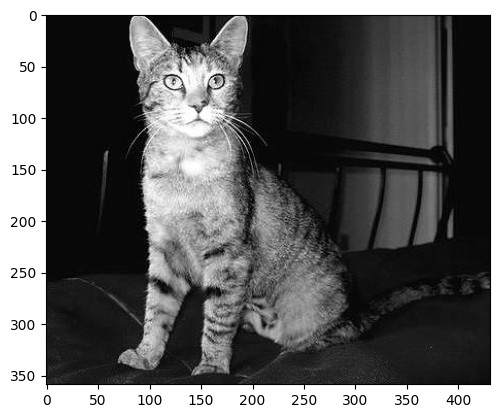

1/1 [==============================] - 0s 119ms/step


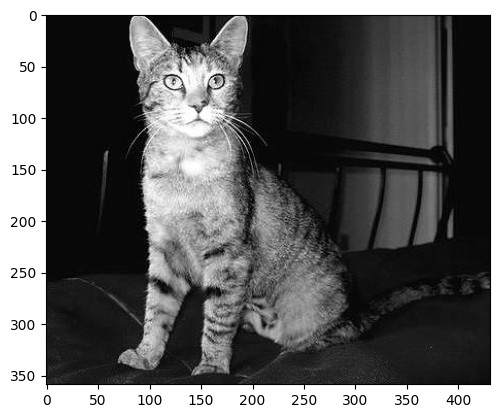

1/1 [==============================] - 0s 40ms/step


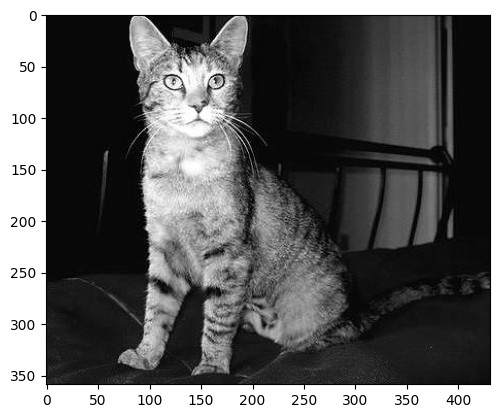

1/1 [==============================] - 0s 35ms/step


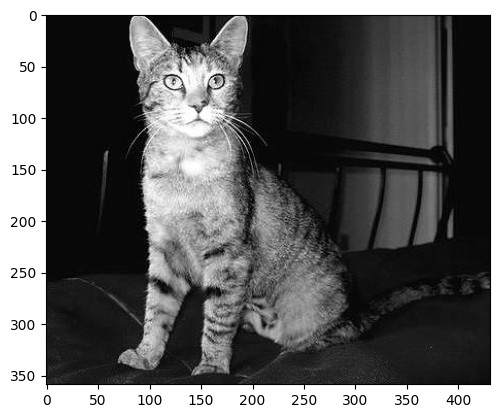

1/1 [==============================] - 0s 22ms/step


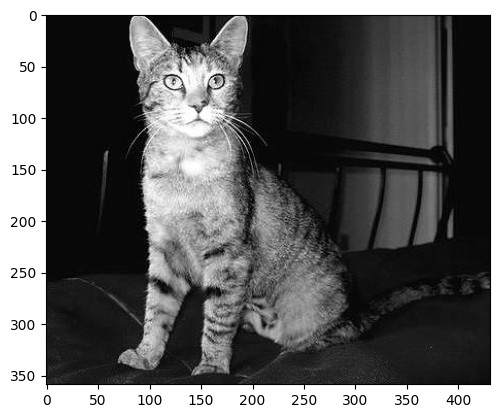

1/1 [==============================] - 0s 29ms/step


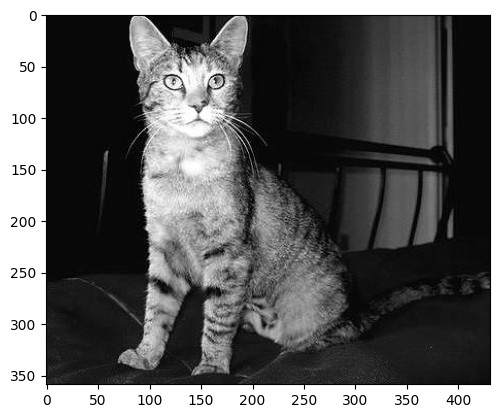

1/1 [==============================] - 0s 22ms/step


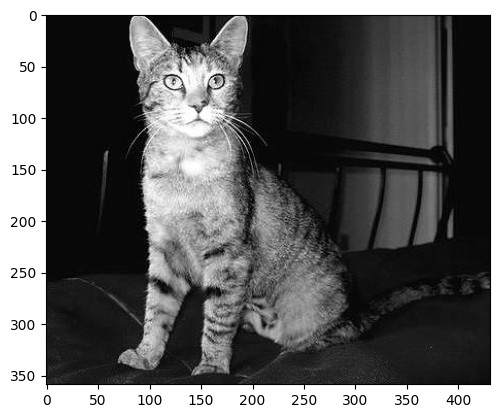

1/1 [==============================] - 0s 27ms/step


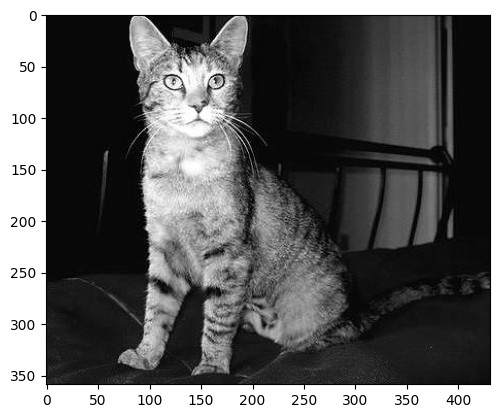

1/1 [==============================] - 0s 22ms/step


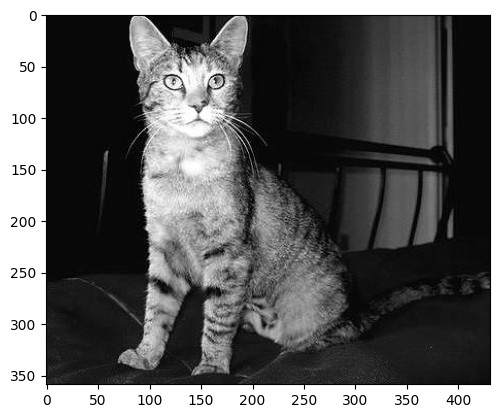

1/1 [==============================] - 0s 21ms/step


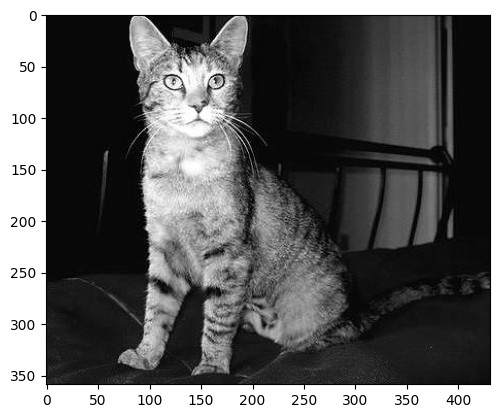

1/1 [==============================] - 0s 21ms/step


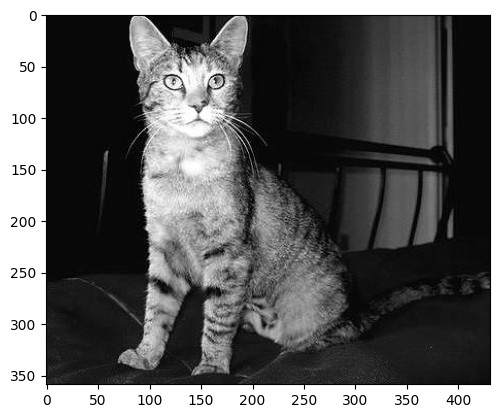

1/1 [==============================] - 0s 26ms/step


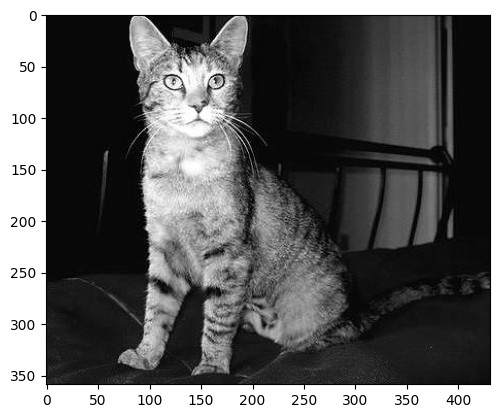

1/1 [==============================] - 0s 22ms/step


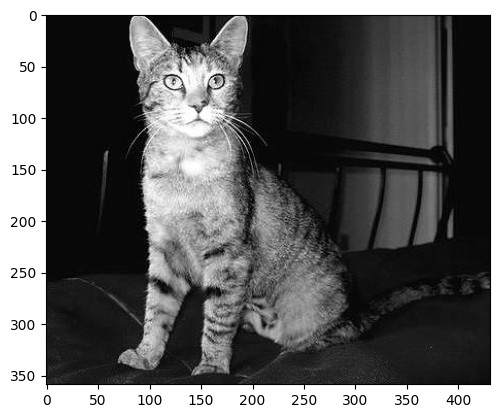

1/1 [==============================] - 0s 22ms/step


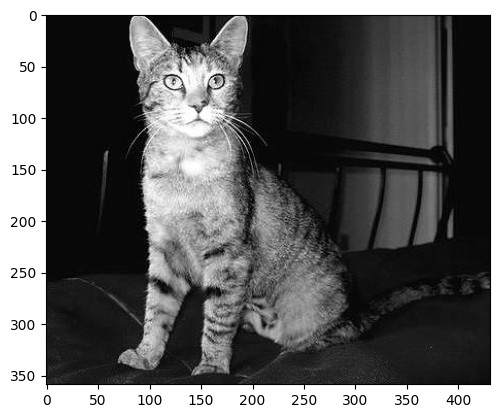

1/1 [==============================] - 0s 24ms/step


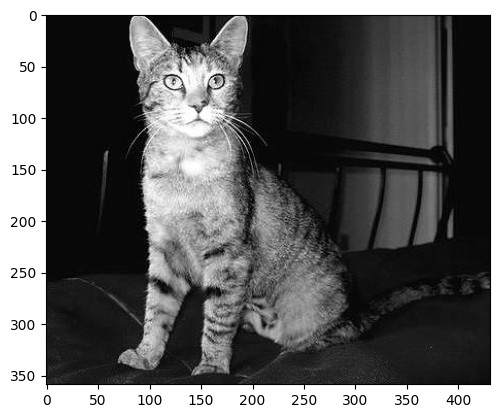

1/1 [==============================] - 0s 21ms/step


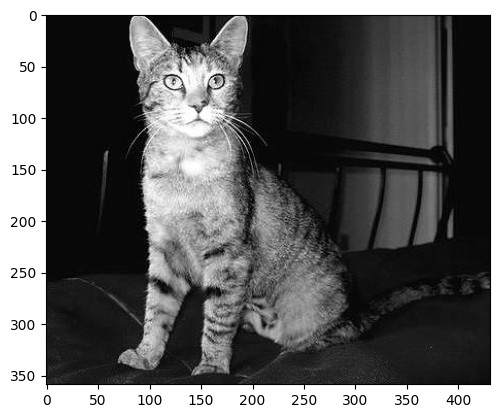

1/1 [==============================] - 0s 23ms/step


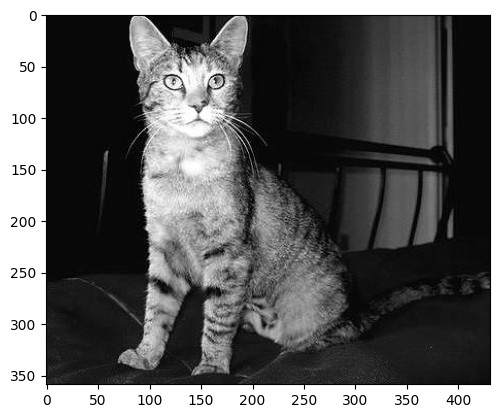

1/1 [==============================] - 0s 34ms/step


KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import gzip
import pickle
from PIL import Image
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Colores(input_shape=(None, None, 3)))

imagen = "/content/drive/MyDrive/DogsCats/test/cat/cat.10000.jpg"

for images in imagen:
    img = Image.open(imagen)
    img_array = img_to_array(img)
    img_array= np.expand_dims(img_array, axis = 0)

    engris = model.predict(img_array)

    plt.imshow(engris[0].squeeze(), cmap="gray")#para asegurar que matplotlib lo mapee en gris
    plt.show()

En el anterior código tuve un error ya que queria que convirtiela todas las imagenes de la carpeta cats pero solo no puede hacer para una imagen por lo que decidí dejar el código así

1/1 [==============================] - 0s 104ms/step


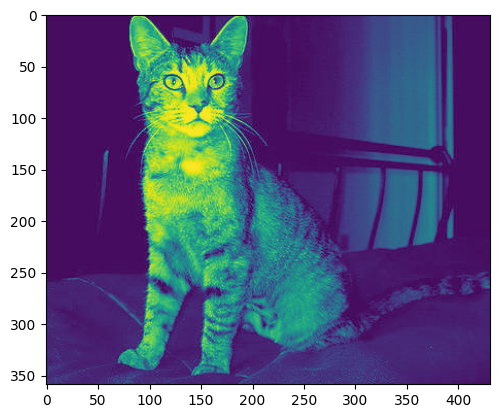

In [ ]:
import os
import numpy as np
import gzip
import pickle
from PIL import Image
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Colores(input_shape=(None, None, 3)))

imagen = "/content/drive/MyDrive/DogsCats/test/cat/cat.10000.jpg"

for images in images:
    img = Image.open(imagen)
    img_array = img_to_array(img)
    img_array= np.expand_dims(img_array, axis = 0)

    engris = model.predict(img_array)

    plt.imshow(engris[0].squeeze())
    plt.show()

# Función 3sen(πx)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, layers, models, losses, metrics
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam, Adamax

from matplotlib import pyplot as plt
import numpy as np

In [ ]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         batch_size=100

         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
            #Loss value
            with tf.GradientTape() as g:
                g.watch(x)

                with tf.GradientTape() as gg:
                    gg.watch(x)
                    y_pred = self(x, training=True)

                y_x = gg.gradient(y_pred,x)
                #jdnjde

            y_xx=g.gradient(y_x,x)

            sode = y_xx + np.pi**2 * y_pred

            y_init = self(x, training=True)
            loss = self.mse(0.,sode)+self.mse(3*tf.math.sin(np.pi * x), y_init)

         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

         self.loss_tracker.update_state(loss)
         # Return a dict mapping metric names to current value
         return {"loss": self.loss_tracker.result()}

In [ ]:
model = ODEsolver()

model.add(Dense(100, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "od_esolver"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1221 (4.77 KB)
Trainable params: 1221 (4.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), metrics=['loss'])

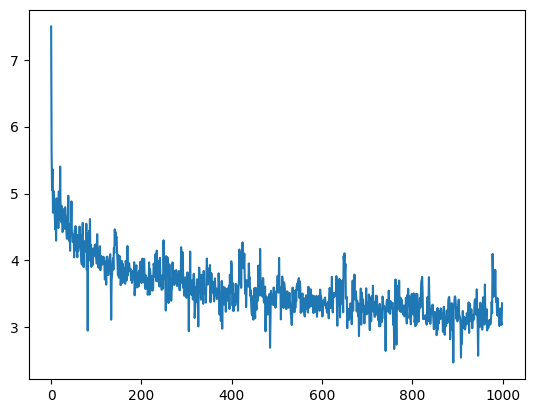

In [ ]:
x = tf.linspace(-1,1,100)
# Entrenar el modelo
history = model.fit(x, epochs=1000, verbose=0)
# Graficar la pérdida
plt.plot(history.history["loss"])

4/4 [==============================] - 0s 5ms/step


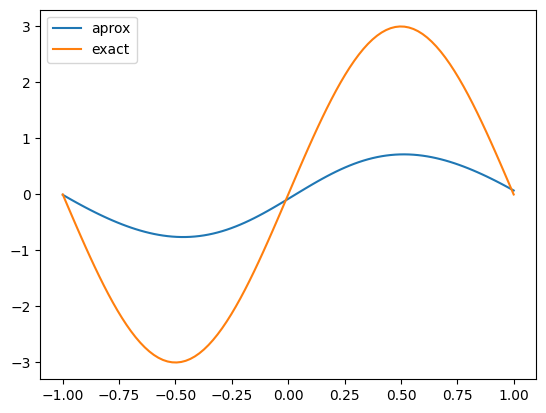

In [ ]:
x_testv = tf.linspace(-1,1,100)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv, (3.0 * tf.sin(np.pi * x)), label="exact")
plt.legend()
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                64        
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
32/32 [==============================] - 1s 3ms/step - loss: 4.1257 - accuracy: 0.0000e+00
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 3.1018 - accuracy: 0.0000e+00
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 1.9831 - acc

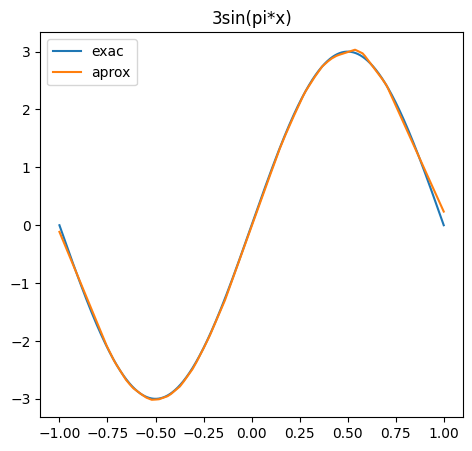

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 1000)
y_a = 3 * np.sin(np.pi * x)
y_b = 1 + 2*x +4*x**2

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(1,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y_a,
                    epochs=50,
                    verbose=1,
                    )

y_pred = model.predict(x)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x, y_a, label='exac')
plt.plot(x, y_pred, label='aprox')
plt.title('3sin(pi*x)')
plt.legend()

#Función 1+2x+4x^3

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam, Adamax

from matplotlib import pyplot as plt
import numpy as np


In [ ]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
             with tf.GradientTape() as tape2:
                 tape2.watch(x)
                 y_pred = self(x, training=True)
             dy = tape2.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0
             y_o = self(x_o,training=True) #valor del modelo en en x_0
             eq = dy - 2.0 -12.0*x**2 #Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno
             ic = 1.0 #valor que queremos para la condicion inicial o el modelo en x_0
             loss = self.mse(0.0, eq) + self.mse(y_o,ic)

        # Apply grads
         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        #update metrics
         self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
         return {"loss": self.loss_tracker.result()}


In [ ]:
model = ODEsolver()

model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))


model.summary()

Model: "od_esolver_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


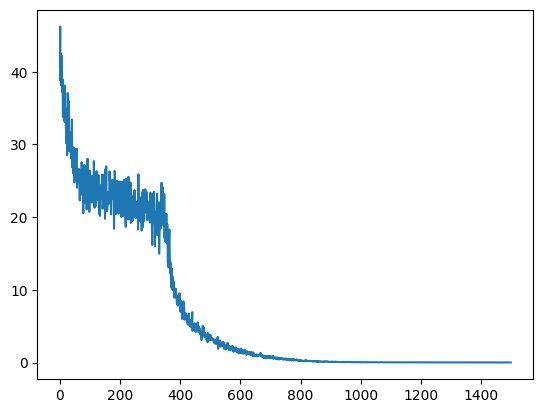

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),metrics=['loss'])

x=tf.linspace(-1,1,500)
history = model.fit(x,epochs=1500,verbose=0)
plt.plot(history.history["loss"])

16/16 [==============================] - 0s 2ms/step


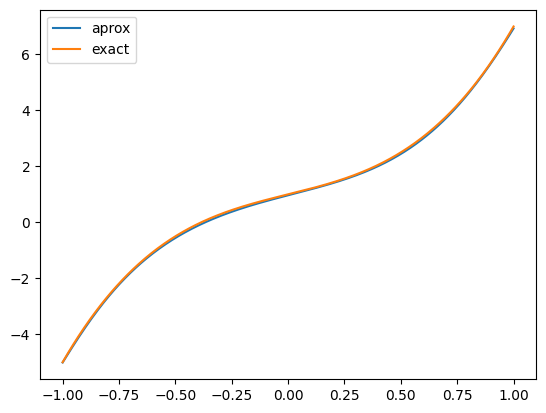

In [ ]:
x_testv = tf.linspace(-1,1,500)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv, (1.0 + 2.0 * x + 4.0 * x ** 3), label="exact")
plt.legend()
plt.show()

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y_b,
                    epochs=50,
                    verbose=1,
                    )

y_pred = model.predict(x)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x, y_b, label='exac')
plt.plot(x, y_pred, label='aprox')
plt.title('f(x) = 1 + 2x +4x^3')
plt.legend()

ValueError: Data cardinality is ambiguous:
  x sizes: 500
  y sizes: 1000
Make sure all arrays contain the same number of samples.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.linspace(-1, 1, 1000)
y_a = 3 * np.sin(np.pi * x)
y_b = 1 + 2*x +4*x**2

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(1,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y_b,
                    epochs=50,
                    verbose=1,
                    )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                64        
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
32/32 [==============================] - 1s 3ms/step - loss: 6.7241 - accuracy: 0.0000e+00
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 4.3518 - accuracy: 0.0000e+00
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 1.8215 - a

32/32 [==============================] - 0s 2ms/step


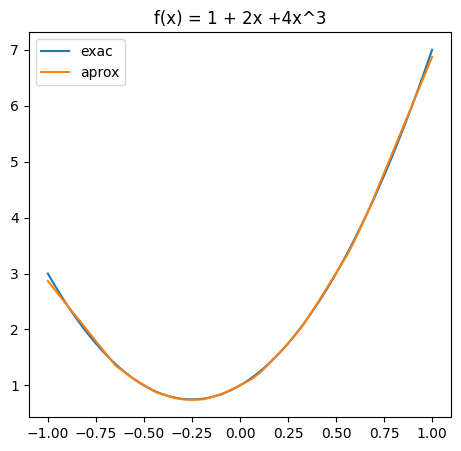

In [ ]:
y_pred = model.predict(x)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x, y_b, label='exac')
plt.plot(x, y_pred, label='aprox')
plt.title('f(x) = 1 + 2x +4x^3')
plt.legend()

#Aproximar polinomialmente

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense
from tensorflow.keras.optimizers import Adam, Nadam, Adamax, SGD, RMSprop
from tensorflow.keras.initializers import RandomUniform

In [ ]:
def desired_function(x):
  return np.cos(2*x)

In [ ]:
# Ejemplo de uso
x_data = np.linspace(-1, 1, 100)
y_data = desired_function(x_data)

In [ ]:
class PolynomialLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PolynomialLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Agrega los coeficientes 'a', 'b', 'c' y 'd' como parámetros entrenables
        self.a = self.add_weight(name="a", shape=(), initializer="ones", trainable=True)
        self.b = self.add_weight(name="b", shape=(), initializer="ones", trainable=True)
        self.c = self.add_weight(name="c", shape=(), initializer="ones", trainable=True)
        self.d = self.add_weight(name="d", shape=(), initializer="ones", trainable=True)
        super(PolynomialLayer, self).build(input_shape)  # Llama a build para establecer el input_shape

    def call(self, inputs):
        x = inputs
        # Calcula el polinomio
        polynomial = self.a + self.b * x + self.c * x**2 + self.d * x**3
        return tf.clip_by_value(polynomial,-1,1)

In [ ]:
model = Sequential()
model.add(PolynomialLayer(input_shape=(1,0)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 polynomial_layer (Polynomi  (None, 1, 0)              4         
 alLayer)                                                        
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


4/4 [==============================] - 0s 4ms/step


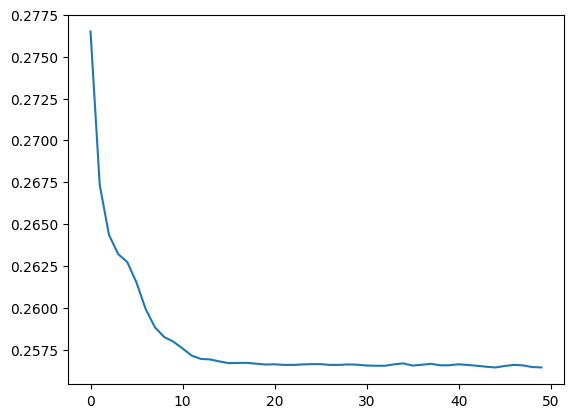

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
history = model.fit(x_data, y_data,epochs=50,verbose=0)
y_pred = model.predict(x_data)
plt.plot(history.history["loss"])

In [ ]:
lt.plot(x_data, y_data, label="Función deseada")
plt.plot(x_data, y_pred, label="Aproximación polinomial")
plt.legend()
plt.title("Ajuste polinomial a una función deseada")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Obtén los valores de los coeficientes
a, b, c, d = model.get_weights()
print("a:", a)
print("b:", b)
print("c:", c)
print("d:", d)

NameError: name 'lt' is not defined

Viendo la documentación de keras, encontré que hay una capa personalizada de polinomios. Por lo que la usaremos

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class PolynomialLayer(Layer):
    def __init__(self, **kwargs):
        super(PolynomialLayer, self).__init__(**kwargs)
        self.a = tf.Variable(initial_value = tf.random.normal(shape=(4,)), trainable=True)
    def call(self, inputs): #1.1En esta parte debería ajustarme a los problemas que distaría el usuario
        x = inputs
        return self.a[0] + self.a[1]*x + self.a[2]*x**2 + self.a[3]*x**3

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

x_train = np.linspace(-1, 1, 100)
y_train = np.cos(2 * x_train)

model = Sequential([PolynomialLayer(input_shape=(1,))])
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 1.8507
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.7499
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 1.6532
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 1.5587
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 1.4668
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 1.3773
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 1.2977
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 1.2167
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1468
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 1.0767
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0113
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9465
Epoch 13/100
4/4 [==============================] - 0s 6ms/s

La siguiente grafica fue con 50 epocas de entrenamiento.

4/4 [==============================] - 0s 5ms/step


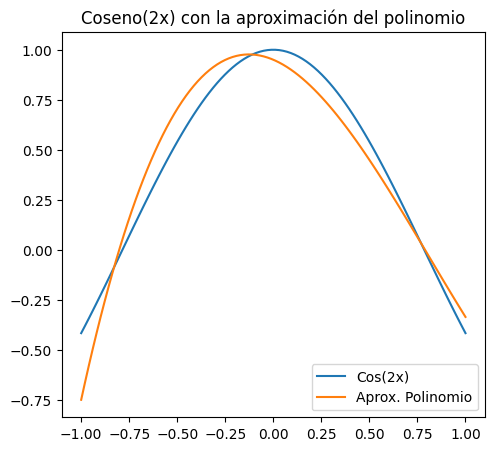

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(x_train)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x_train, y_train, label='Cos(2x)')
plt.plot(x_train, y_pred, label='Aprox. Polinomio')
plt.title('Coseno(2x) con la aproximación del polinomio')
plt.legend()

La epoca de abajo muestra la red entrenada con 100 épocas.

4/4 [==============================] - 0s 4ms/step


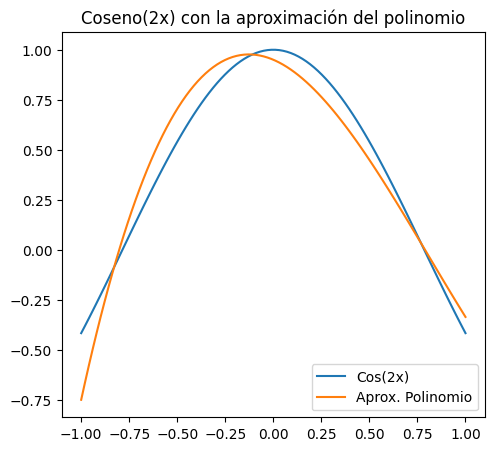

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(x_train)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x_train, y_train, label='Cos(2x)')
plt.plot(x_train, y_pred, label='Aprox. Polinomio')
plt.title('Coseno(2x) con la aproximación del polinomio')
plt.legend()

Con 200 epocas

In [ ]:
model = Sequential([PolynomialLayer(input_shape=(1,))])
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 2.6607
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 2.5325
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 2.4099
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 2.3035
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 2.1987
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 2.1041
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 2.0190
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 1.9401
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 1.8698
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 1.8035
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 1.7387
Epoch 12/200
4/4 [==============================] - 0s 7ms/step - loss: 1.6806
Epoch 13/200
4/4 [==============================] - 0s 5ms/st

4/4 [==============================] - 0s 5ms/step


Text(0.5, 1.0, 'Coseno(2x) con la aproximación del polinomio')

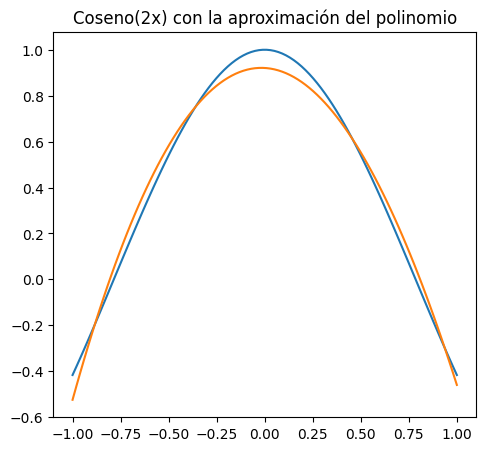

In [ ]:
y_pred = model.predict(x_train)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x_train, y_train, label='Cos(2x)')
plt.plot(x_train, y_pred, label='Aprox. Polinomio')
plt.title('Coseno(2x) con la aproximación del polinomio')

Epoch 1/50
4/4 [==============================] - 1s 5ms/step - loss: 0.9185
Epoch 2/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8572
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8058
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.7590
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.7167
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6806
Epoch 7/50
4/4 [==============================] - 0s 6ms/step - loss: 0.6446
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6128
Epoch 9/50
4/4 [==============================] - 0s 9ms/step - loss: 0.5859
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.5593
Epoch 11/50
4/4 [==============================] - 0s 5ms/step - loss: 0.5351
Epoch 12/50
4/4 [==============================] - 0s 5ms/step - loss: 0.5125
Epoch 13/50
4/4 [==============================] - 0s 5ms/step - loss: 0.

Text(0.5, 1.0, 'Coseno(2x) con la aproximación del polinomio')

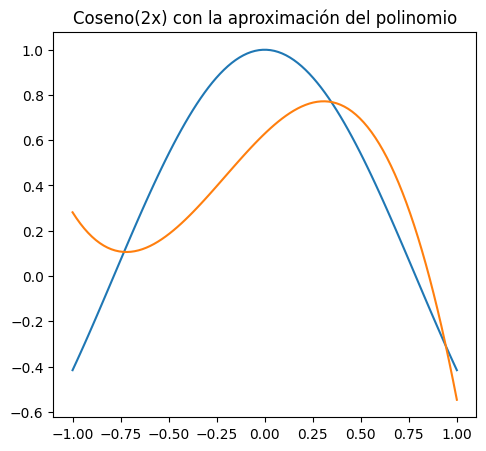

In [ ]:
model = Sequential([PolynomialLayer(input_shape=(1,))])
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model.fit(x_train, y_train, epochs=50)

y_pred = model.predict(x_train)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x_train, y_train, label='Cos(2x)')
plt.plot(x_train, y_pred, label='Aprox. Polinomio')
plt.title('Coseno(2x) con la aproximación del polinomio')

#Ecuación xy'+y=x^2cos(x)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
             with tf.GradientTape() as tape2:
                 tape2.watch(x)
                 y_pred = self(x, training=True)
             dy = tape2.gradient(y_pred, x)
             x_o = tf.zeros((batch_size,1))
             y_o = self(x_o,training=True)
             eq = x * dy + y_pred - x**2 * tf.math.cos(x)
             ic = 0.0
             loss = self.mse(0.0, eq) + self.mse(y_o,ic)

         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
         self.loss_tracker.update_state(loss)
         return {"loss": self.loss_tracker.result()}

In [ ]:
model = PDEsolver()
model.add(Dense(30, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))
model.summary()

NameError: name 'PDEsolver' is not defined

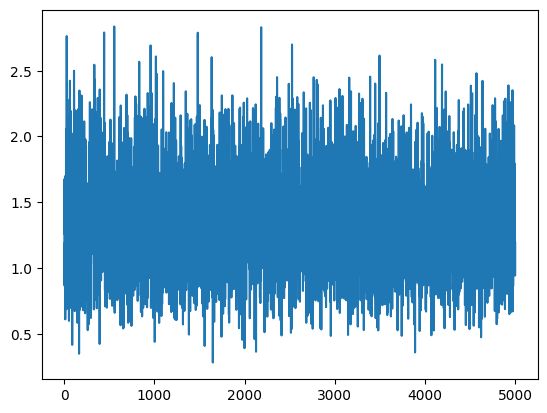

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),metrics=['loss'])
x=tf.linspace(-5,5,500)
history = model.fit(x,epochs=5000,verbose=0)
plt.plot(history.history["loss"])

16/16 [==============================] - 0s 3ms/step


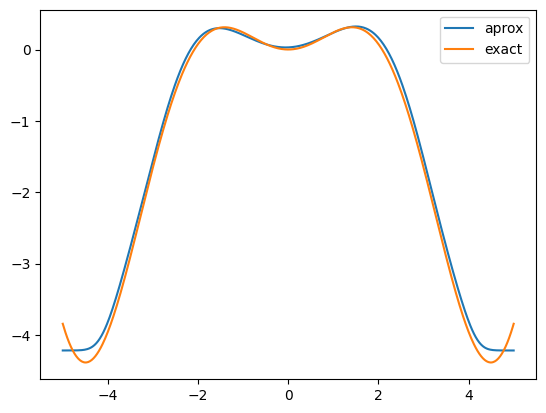

In [ ]:
x_testv = tf.linspace(-5,5,500)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,((x**2 - 2)/x) * tf.sin(x) + 2*tf.cos(x),label="exact")
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam, Adamax

from matplotlib import pyplot as plt
import numpy as np

In [ ]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
             with tf.GradientTape() as tape2:
                 tape2.watch(x)
                 y_pred = self(x, training=True)
             dy = tape2.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0
             y_o = self(x_o,training=True) #valor del modelo en en x_0
             eq = x * dy +y_pred - x**2 * tf.math.cos(x) #Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno
             ic = 0.0 #valor que queremos para la condicion inicial o el modelo en x_0
             loss = self.mse(0.0, eq) + self.mse(y_o,ic)

        # Apply grads
         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        #update metrics
         self.loss_tracker.update_state(loss)
        # Return a dict mapping metric names to current value
         return {"loss": self.loss_tracker.result()}


In [ ]:
model = ODEsolver()

model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))


model.summary()

Model: "od_esolver_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


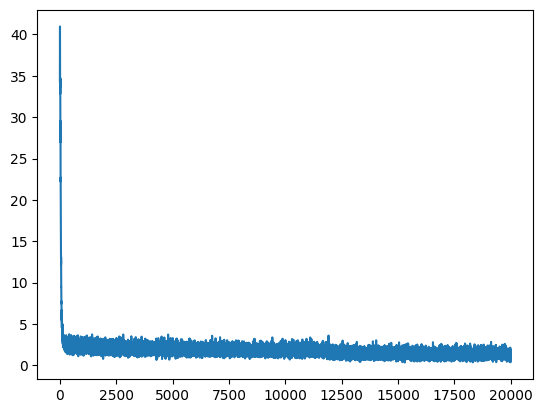

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),metrics=['loss'])

x=tf.linspace(-5,5,500)
history = model.fit(x,epochs=20000,verbose=0)
plt.plot(history.history["loss"])

16/16 [==============================] - 0s 3ms/step


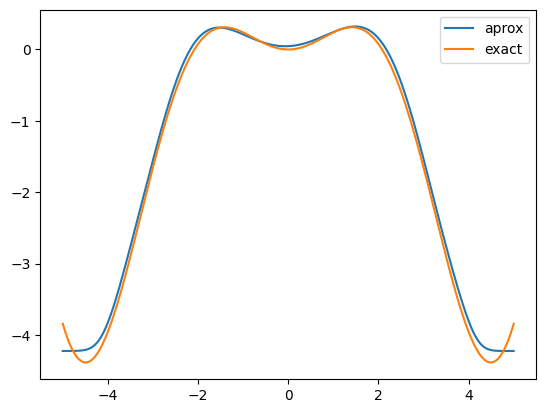

In [ ]:
x_testv = tf.linspace(-5,5,500)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv, ((x**2 - 2) / x) * tf.sin(x) + 2 * tf.cos(x), label="exact")
plt.legend()
plt.show()

#Segunda ecuación

In [ ]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0

         with tf.GradientTape() as tape:
             with tf.GradientTape() as tape1:
                 with tf.GradientTape() as tape2:
                     tape2.watch(x)
                     y_pred = self(x, training=True)
                 dy = tape2.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             ddy = tape1.gradient(dy, x) #segunda derivada del modelo con respecto a entradas x

         with tf.GradientTape() as tape3:
             tape3.watch(x_o)
             y_o = self(x_o,training=True) #valor del modelo en en x_0
         dy_o = tape3.gradient(y_o, x_o) #derivada del modelo en en x_0

         eq = ddy + y_pred #Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno
         ic1 = 1.
         ic2 = -0.5
         loss = self.mse(0., eq) + self.mse(y_o,ic1) + self.mse(y_o,ic2)

         grads = tape.gradient(loss, self.trainable_variables)
         if None in grads:
             print("Gradient for some variable is None")
         else:
             self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
         self.loss_tracker.update_state(loss)
         return {"loss": self.loss_tracker.result()}

In [ ]:
model = ODEsolver()
model.add(Dense(20, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),metrics=['loss'])
x=tf.linspace(-5,5,500)
history = model.fit(x,epochs=500,verbose=0)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "<ipython-input-51-ea51cc91bc0e>", line 32, in train_step
        eq = ddy + y_pred #Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno

    ValueError: None values not supported.


16/16 [==============================] - 0s 6ms/step


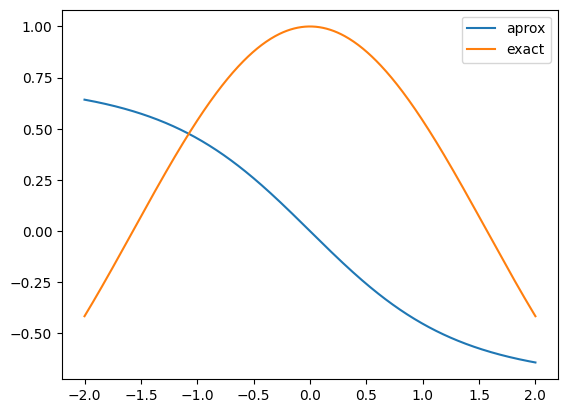

In [ ]:
x_testv = tf.linspace(-2,2,500)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,np.cos(x_testv),label="exact")
plt.legend()
plt.show()

Otro metodo

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, layers, models, losses, metrics
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam, Adamax

from matplotlib import pyplot as plt
import numpy as np

In [ ]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         batch_size=100

         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
            #Loss value
            with tf.GradientTape() as g:
                g.watch(x)

                with tf.GradientTape() as gg:
                    gg.watch(x)
                    y_pred = self(x, training=True)

                y_x = gg.gradient(y_pred,x)
                #jdnjde

            y_xx=g.gradient(y_x,x)

            sode = y_xx + y_pred

            y_init = self(x, training=True)
            loss = self.mse(0.,sode)+self.mse(tf.math.sin(x)-0.5*tf.math.cos(x), y_init)

         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

         self.loss_tracker.update_state(loss)
         # Return a dict mapping metric names to current value
         return {"loss": self.loss_tracker.result()}


In [ ]:
model = ODEsolver()

model.add(Dense(100, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "od_esolver_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               200       
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1221 (4.77 KB)
Trainable params: 1221 (4.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", metrics=['loss'])

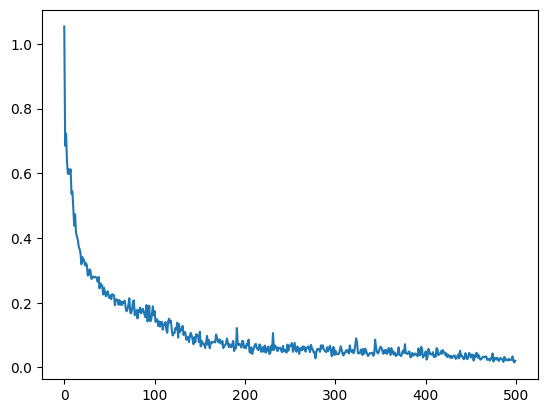

In [ ]:
x = tf.linspace(-5,5,100)
# Entrenar el modelo
history = model.fit(x, epochs=500, verbose=0)
# Graficar la pérdida
plt.plot(history.history["loss"])

4/4 [==============================] - 0s 4ms/step


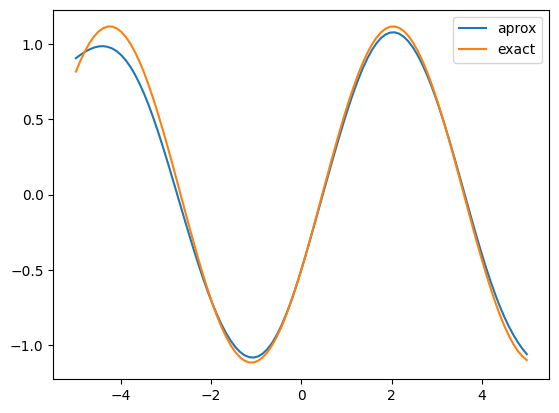

In [ ]:
x_testv = tf.linspace(-5,5,100)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv, (tf.sin(x)-0.5*tf.cos(x)), label="exact")
plt.legend()
plt.show()